Ref: https://github.com/phanakata/ML_for_kirigami_design/blob/master/models/CNN_regression/convert_coarse_to_fine.ipynb

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr

In [2]:
raw_data= np.loadtxt('./15grid_shuffled.dat')
raw_data.shape, raw_data.dtype

((29791, 18), dtype('float64'))

In [3]:
coarse_image = raw_data[:, 0:15].reshape(-1, 3, 5)
coarse_image.shape

(29791, 3, 5)

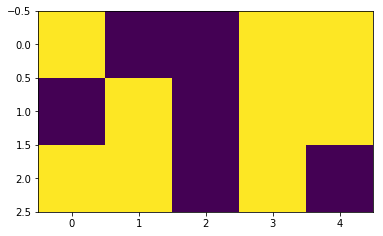

In [4]:
plt.imshow(coarse_image[0])

# Convert coarse grid to fine grid

In [5]:
from generate_lattice_ref import convert_to_fine_grid

In [6]:
%time fine_image = convert_to_fine_grid(raw_data)

CPU times: user 45.5 s, sys: 1.04 s, total: 46.6 s
Wall time: 48 s


In [7]:
fine_image.shape

(29791, 30, 80)

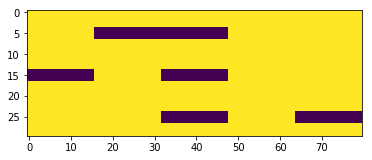

In [8]:
plt.imshow(fine_image[0])

# Wrap as xarray Dataset

In [9]:
ds = xr.Dataset({'coarse_image': (['sample', 'y_c', 'x_c'],  coarse_image),
                 'fine_image': (['sample', 'y', 'x'], fine_image),
                 'strain': (['sample'], raw_data[:, 15]),
                 'stress': (['sample'], raw_data[:, 17]),
                }).astype(np.float32)

In [10]:
ds

<xarray.Dataset>
Dimensions:       ()
Data variables:
    coarse_image  (sample, y_c, x_c) float32 1.0 0.0 0.0 1.0 1.0 0.0 1.0 0.0 ...
    fine_image    (sample, y, x) float32 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 ...
    strain        (sample) float32 0.27717704 0.30521148 0.24878655 ...
    stress        (sample) float32 46.20475 65.82303 56.71409 54.158566 ...

In [12]:
ds.to_netcdf('./graphene_processed.nc')

In [13]:
ls -lh graphene_processed.nc

-rw-r--r--  1 zhuangjw  staff   275M Oct  5 13:41 graphene_processed.nc


# Plot data

In [14]:
ds = xr.open_dataset('./graphene_processed.nc')

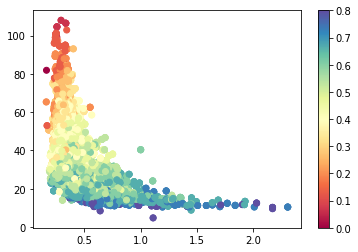

In [15]:
cut_density = 1 - ds['coarse_image'].mean(dim=['x_c', 'y_c'])
plt.scatter(ds['strain'], ds['stress'], c=cut_density, cmap=plt.cm.Spectral)
plt.colorbar()

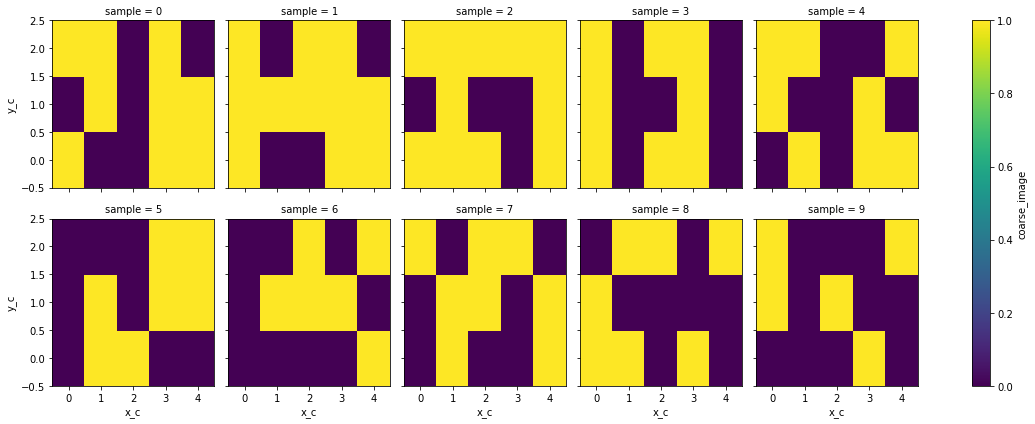

In [16]:
ds['coarse_image'].isel(sample=slice(0, 10)).plot(col='sample', col_wrap=5)

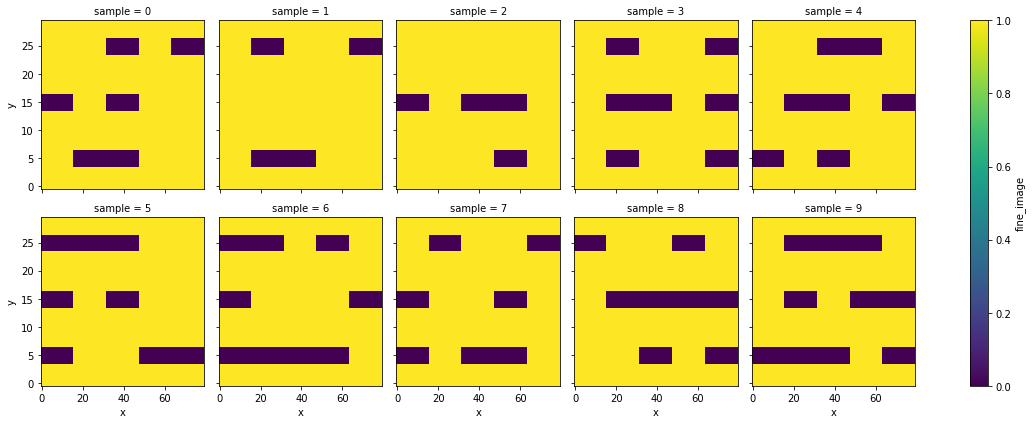

In [17]:
ds['fine_image'].isel(sample=slice(0, 10)).plot(col='sample', col_wrap=5)